# ***RESULTADOS***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. MACHINE LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
3. **RESULTADOS**
    - [3.1. Visualización y reporting de los resultados](#31)
    - [3.2. Creación de un pipeline para el flujo automatizado](#32)
---

In [1]:
# Librery
from utils.libreries import *

%matplotlib inline 

##  **3.1. Visualización y reporting de los resultados**<a id='31'></a>

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


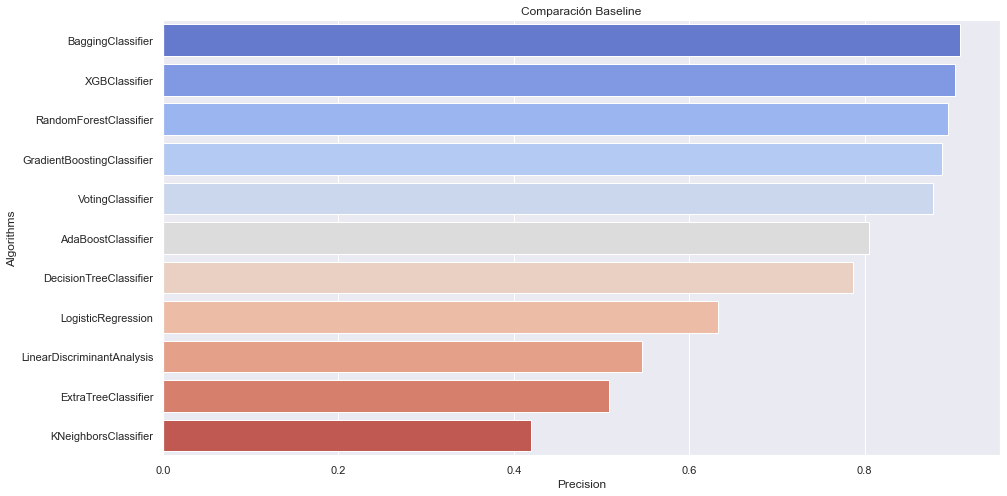

In [11]:
saved_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)

cv_means = saved_metrics['Precision']
cv_means = cv_means[:-1]
lista = saved_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='coolwarm')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación Baseline")

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


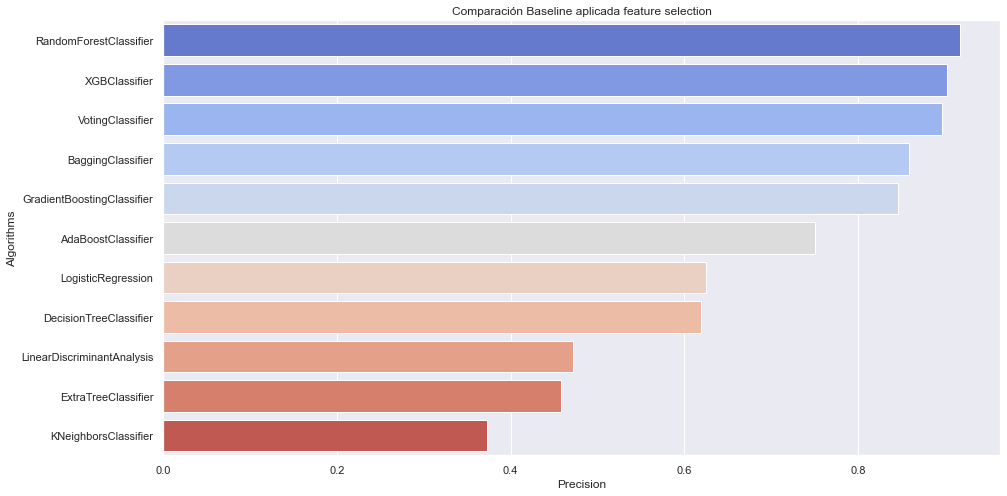

In [9]:
saved_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)

cv_means = saved_metrics['Precision']
cv_means = cv_means[:-1]
lista = saved_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='coolwarm')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación Baseline aplicada feature selection")

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


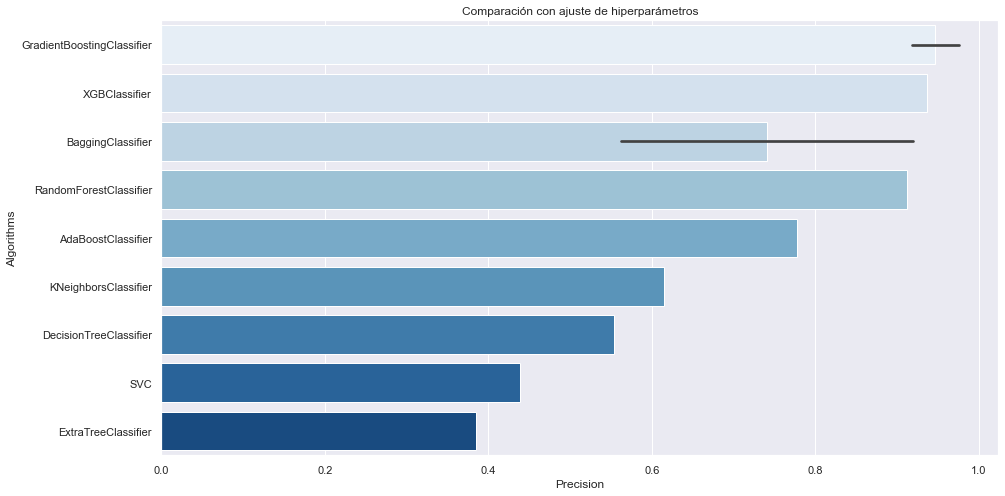

In [12]:
saved_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Precision',ascending=False)

cv_means = saved_metrics['Precision']
cv_means = cv_means[:-1]
lista = saved_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='Blues')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación con ajuste de hiperparámetros")

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


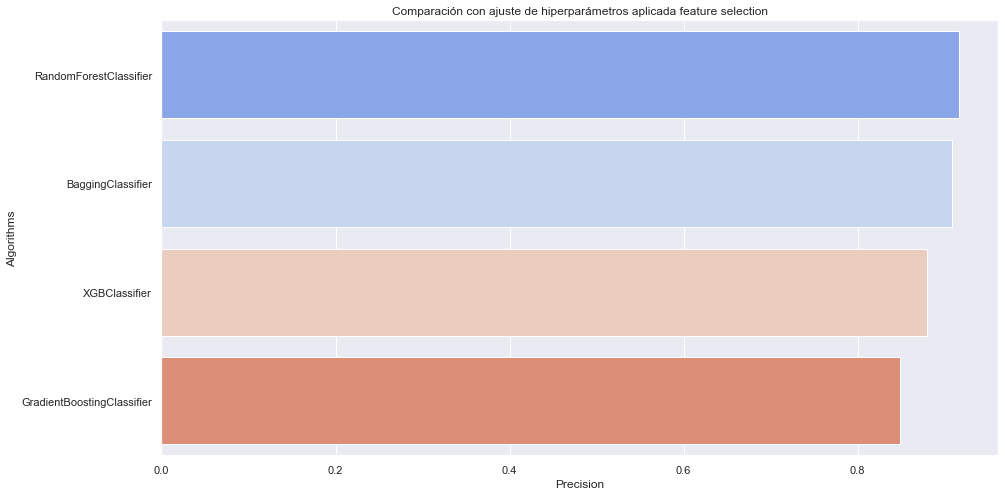

In [18]:
saved_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)

cv_means = saved_metrics['Precision']
lista = saved_metrics['model']


cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='coolwarm')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación con ajuste de hiperparámetros aplicada feature selection")

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


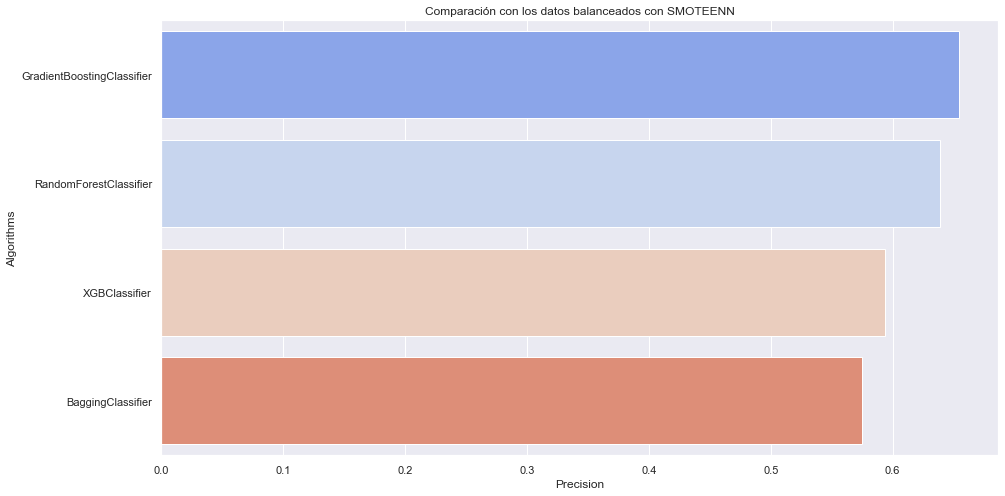

In [20]:
saved_metrics = pd.read_csv('model/model_metrics/metrics_balanced.csv',sep=';').sort_values(by='Precision',ascending=False)

cv_means = saved_metrics['Precision']
lista = saved_metrics['model']

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='coolwarm')

cv_plot.set_xlabel("Precision")
cv_plot = cv_plot.set_title("Comparación con los datos balanceados con SMOTEENN")

El ***modelo considerado óptimo*** según las métricas obtenidas es el siguiente y es el que se utilizará en la automatización/productivización.

In [ ]:
modelo_seleccionado = 'Elegir modelo' 

##  **3.1. Creación de un pipeline para el flujo automatizado**<a id='31'></a>

In [ ]:
pipeline = make_pipeline(
    ("scaler", StandardScaler()),
    ("balance", SMOTE()),
    ("selectkbest", StratifiedKFold()),
    ("modelo", modelo_seleccionado))

pipeline.fit(X_train,y_train)


In [ ]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("balance", SMOTE()),
    ("selectkbest", StratifiedKFold()),
    ("modelo", modelo_seleccionado)])

pipeline.fit(X_train,y_train)


In [ ]:
y_pred = pipeline.predict(X_test)